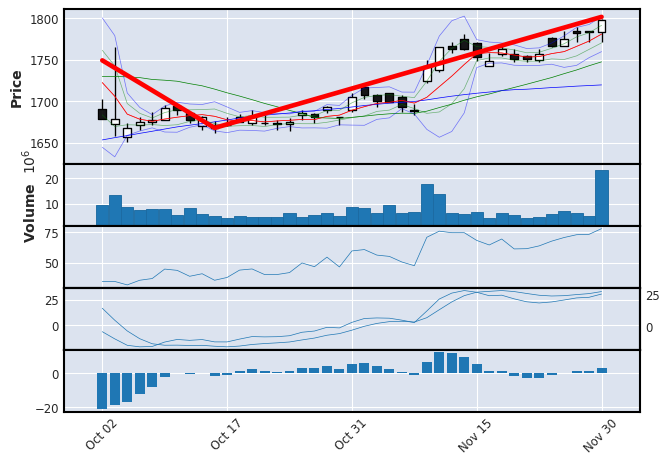

In [1]:
from screener.models.analyzer import Analyzer
from screener.repository.history import History
import mplfinance as mpf

h = History()
a = Analyzer(h.get_history(9434))

a.add_sma(5) \
    .add_sma(20) \
    .add_sma(50) \
    .add_rsi(10, 'rsi') \
    .add_macd(5, 20, 5, 'macd') \
    .add_bb(5, 'bb') \
    .add_zigzag(0.02)

df = a.df['2023-10-01':'2023-11-30']

series = [
    mpf.make_addplot(df['sma05'], color='red', width=0.5),
    mpf.make_addplot(df['sma20'], color='green', width=0.5),
    mpf.make_addplot(df['sma50'], color='blue', width=0.5),

    # mpf.make_addplot(df['Volume'], panel = 1, width = 0.5),

    mpf.make_addplot(df['rsi'], panel = 2, width = 0.5),
    mpf.make_addplot(df['macd'], panel = 3, width = 0.5),
    mpf.make_addplot(df['macdsig'], panel = 3, width = 0.5),
    mpf.make_addplot(df['macdhis'], panel = 4, type='bar'),

    mpf.make_addplot(df['bbmid'], color='red', alpha=0.5, width=0.5),
    mpf.make_addplot(df['bbu1'], color='green', alpha=0.5, width=0.5),
    mpf.make_addplot(df['bbd1'], color='green', alpha=0.5, width=0.5),
    mpf.make_addplot(df['bbu2'], color='blue', alpha=0.5, width=0.5),
    mpf.make_addplot(df['bbd2'], color='blue', alpha=0.5, width=0.5),

    mpf.make_addplot(df['zigzag'], color='red')
]


mpf.plot(df, type='candle', fontscale=0.7, addplot=series, volume=True)




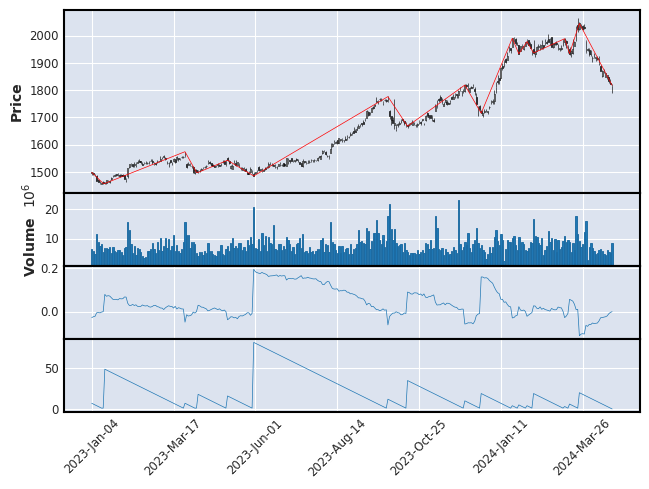

In [2]:
from screener.models.analyzer import Analyzer
from screener.repository.history import History
import mplfinance as mpf

h = History()
a = Analyzer(h.get_history(9434))

a.add_sma(5) \
    .add_zigzag(0.02)

df = a.df

series = [
    mpf.make_addplot(df['zigzag'], color='red', width=0.5),
    mpf.make_addplot(df['expected'], width=0.5, panel=2),
    mpf.make_addplot(df['period'], width=0.5, panel=3),
]


mpf.plot(df, type='candle', fontscale=0.7, addplot=series, volume=True)




In [5]:
from screener.models.analyzer import Analyzer
from screener.repository.history import History
import mplfinance as mpf
from minepy import MINE


mine = MINE(alpha=0.6, c=15, est='mic_approx')
h = History()
a = Analyzer(h.get_history(9434))

a.add_sma(5) \
    .add_sma(20) \
    .add_sma(50) \
    .add_rsi(10, 'rsi') \
    .add_macd(5, 20, 5, 'macd') \
    .add_bb(5, 'bb') \
    .add_zigzag(0.02)

mine.compute_score(a.df['macd'], a.df['expected'])
print('=====> MACD <=====')
print(f'MIC = {mine.mic()}')
print(f'MAS = {mine.mas()}')
print(f'MEV = {mine.mev()}')
print(f'MCN = {mine.mcn()}')
print(f'MCN_GENERAL = {mine.mcn_general()}')
print(f'GMIC = {mine.gmic()}')
print(f'TIC = {mine.tic()}')
mine.compute_score(a.df['macdhis'], a.df['expected'])
print('=====> HIST <=====')
print(f'MIC = {mine.mic()}')
print(f'MAS = {mine.mas()}')
print(f'MEV = {mine.mev()}')
print(f'MCN = {mine.mcn()}')
print(f'MCN_GENERAL = {mine.mcn_general()}')
print(f'GMIC = {mine.gmic()}')
print(f'TIC = {mine.tic()}')
mine.compute_score(a.df['bbd1'], a.df['expected'])
print('=====> BBD1 <=====')
print(f'MIC = {mine.mic()}')
print(f'MAS = {mine.mas()}')
print(f'MEV = {mine.mev()}')
print(f'MCN = {mine.mcn()}')
print(f'MCN_GENERAL = {mine.mcn_general()}')
print(f'GMIC = {mine.gmic()}')
print(f'TIC = {mine.tic()}')
mine.compute_score(a.df['bbd2'], a.df['expected'])
print('=====> BBD2 <=====')
print(f'MIC = {mine.mic()}')
print(f'MAS = {mine.mas()}')
print(f'MEV = {mine.mev()}')
print(f'MCN = {mine.mcn()}')
print(f'MCN_GENERAL = {mine.mcn_general()}')
print(f'GMIC = {mine.gmic()}')
print(f'TIC = {mine.tic()}')
mine.compute_score(a.df['bbd3'], a.df['expected'])
print('=====> BBD3 <=====')
print(f'MIC = {mine.mic()}')
print(f'MAS = {mine.mas()}')
print(f'MEV = {mine.mev()}')
print(f'MCN = {mine.mcn()}')
print(f'MCN_GENERAL = {mine.mcn_general()}')
print(f'GMIC = {mine.gmic()}')
print(f'TIC = {mine.tic()}')

=====> MACD <=====
MIC = 0.36223150723526165
MAS = 0.10819958142711397
MEV = 0.36223150723526165
MCN = 4.906890595608519
MCN_GENERAL = 2.584962500721156
GMIC = 0.2583145143558541
TIC = 11.267529251272975
=====> HIST <=====
MIC = 0.3561462749218738
MAS = 0.060503938356290754
MEV = 0.3561462749218738
MCN = 4.906890595608519
MCN_GENERAL = 2.584962500721156
GMIC = 0.2512936109951515
TIC = 10.785129511466586
=====> BBD1 <=====
MIC = 0.39747735432408526
MAS = 0.06001230490014614
MEV = 0.39747735432408526
MCN = 4.906890595608519
MCN_GENERAL = 2.584962500721156
GMIC = 0.308080261742025
TIC = 14.120146492888482
=====> BBD2 <=====
MIC = 0.43738756176268817
MAS = 0.09992251233874905
MEV = 0.43738756176268817
MCN = 4.906890595608519
MCN_GENERAL = 2.584962500721156
GMIC = 0.33699932496281476
TIC = 14.239778519812804
=====> BBD3 <=====
MIC = 0.3876748650141094
MAS = 0.056863658768249725
MEV = 0.3876748650141094
MCN = 4.906890595608519
MCN_GENERAL = 2.0
GMIC = 0.302359750567724
TIC = 13.5780100719551

指標値の意味。。。？

![](img/mic.png)

[参考サイト](https://www.slideshare.net/ShushiNamba/mic-67208737)
